In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-conversation-corpus-100k/train.csv
/kaggle/input/medical-conversation-corpus-100k/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv('/kaggle/input/medical-conversation-corpus-100k/train.csv')
df.head()

,Conversation
0,The conversation between human and AI assistan...
1,The conversation between human and AI assistan...
2,The conversation between human and AI assistan...
3,The conversation between human and AI assistan...
4,The conversation between human and AI assistan...


In [5]:
df.columns

Index(['Conversation'], dtype='object')

In [6]:
# Basic info about the dataset
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106556 entries, 0 to 106555
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Conversation  106556 non-null  object
dtypes: object(1)
memory usage: 832.6+ KB
None


In [7]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Conversation    0
dtype: int64


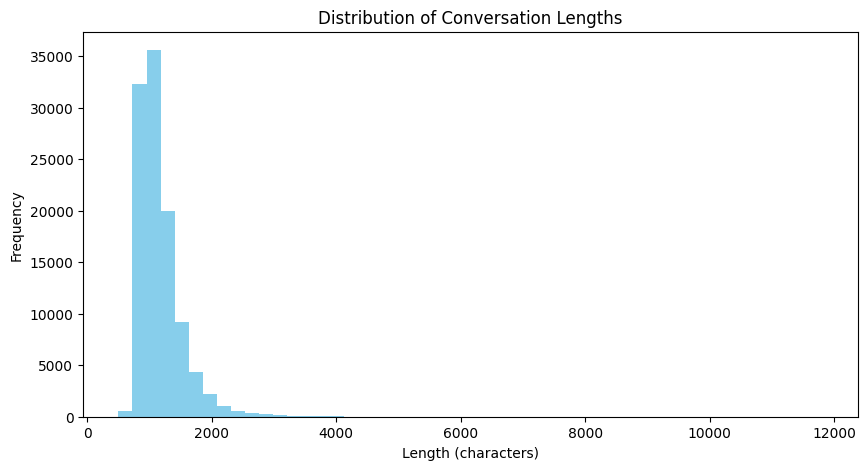

In [8]:
# Visualize conversation length distribution
df['Conversation_length'] = df['Conversation'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(df['Conversation_length'], bins=50, color='skyblue')
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Since this is a conversation dataset, we'll create a simple binary classification task
# Let's assume we're trying to predict if a conversation is long or short
df['is_long'] = df['Conversation_length'].apply(lambda x: 1 if x > 500 else 0)

In [10]:
# Split data into features and target
X = df['Conversation']
y = df['is_long']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
# Initialize and train Logistic Regression model (good baseline for text classification)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nBest Model: Logistic Regression")


Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     21312

    accuracy                           1.00     21312
   macro avg       1.00      1.00      1.00     21312
weighted avg       1.00      1.00      1.00     21312


Best Model: Logistic Regression


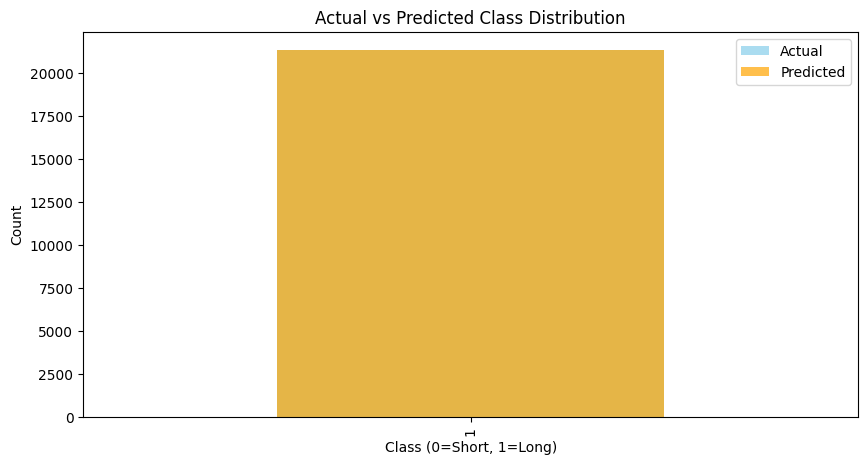

In [15]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the comparison
plt.figure(figsize=(10, 5))
results['Actual'].value_counts().plot(kind='bar', color='skyblue', alpha=0.7, label='Actual')
results['Predicted'].value_counts().plot(kind='bar', color='orange', alpha=0.7, label='Predicted')
plt.title('Actual vs Predicted Class Distribution')
plt.xlabel('Class (0=Short, 1=Long)')
plt.ylabel('Count')
plt.legend()
plt.show()